               X             Y                    Date  ConfirmedCovidCases  \
0 -856335.869598  7.036492e+06  2020/02/29 00:00:00+00                    1   
1 -856335.869598  7.036492e+06  2020/03/03 00:00:00+00                    1   
2 -856335.869598  7.036492e+06  2020/03/04 00:00:00+00                    4   
3 -856335.869598  7.036492e+06  2020/03/05 00:00:00+00                    7   
4 -856335.869598  7.036492e+06  2020/03/06 00:00:00+00                    5   

   TotalConfirmedCovidCases  ConfirmedCovidDeaths  TotalCovidDeaths  \
0                         1                   0.0                 0   
1                         2                   0.0                 0   
2                         6                   0.0                 0   
3                        13                   0.0                 0   
4                        18                   0.0                 0   

    StatisticsProfileDate  CovidCasesConfirmed  HospitalisedCovidCases  ...  \
0  2020/02/27 00:00

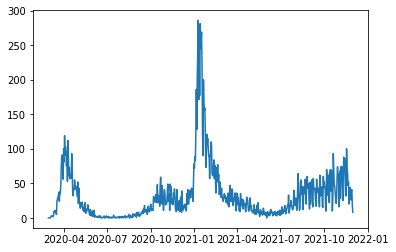

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df2 = pd.read_csv('c19.csv')
print(df2.head())
print(df2.shape)


df2['Date'] = pd.to_datetime(df2['Date']).dt.date
df2['HCC'] = df2['HospitalisedCovidCases'].fillna(0)
prev_num = 0
df2['new_HCC'] = df2['HCC']
for index,row in df2.iterrows():
    df2.at[index, 'new_HCC'] = row['HCC'] - prev_num
    prev_num = row['HCC']
plt.plot(df2['Date'], df2['new_HCC'])


Start:  2020-09-18 00:00:00
End:  2021-11-30 00:00:00
Tfull:  [1600387200000000000 1600473600000000000 1600560000000000000
 1600646400000000000 1600732800000000000 1600819200000000000
 1600905600000000000 1600992000000000000 1601078400000000000
 1601164800000000000 1601251200000000000 1601337600000000000
 1601424000000000000 1601510400000000000 1601596800000000000
 1601683200000000000 1601769600000000000 1601856000000000000
 1601942400000000000 1602028800000000000 1602115200000000000
 1602201600000000000 1602288000000000000 1602374400000000000
 1602460800000000000 1602547200000000000 1602633600000000000
 1602720000000000000 1602806400000000000 1602892800000000000
 1602979200000000000 1603065600000000000 1603152000000000000
 1603238400000000000 1603324800000000000 1603411200000000000
 1603497600000000000 1603584000000000000 1603670400000000000
 1603756800000000000 1603843200000000000 1603929600000000000
 1604016000000000000 1604102400000000000 1604188800000000000
 1604275200000000000 16

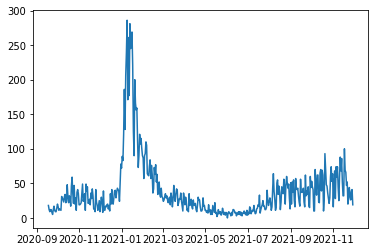

In [14]:
start=pd.to_datetime(df2['Date'][200])
print("Start: ", start)
end=pd.to_datetime(df2['Date'][638])
print("End: ", end)
t_full=pd.array(pd.DatetimeIndex(df2.iloc[200:638,2])).astype(np.int64)
print("Tfull: ", t_full)
dt = t_full[2] - t_full[1] 
print("Data sampling interval", dt)

t = (t_full[33]-t_full[32])/60/60/24
print(t)
ss = pd.array(pd.Index(df2.iloc[200:638,42])).astype(np.int64)
og_ss = ss
print(og_ss.size)
plt.plot(df2.iloc[200:638, 2], ss)
plt.show()

stride = 1
lag = 2 #determines the feature vector size
dd = 1 #number of samples in a day 
q = 1
XX = og_ss[0:og_ss.size - q - lag * dd:stride]
for i in range(1,lag): 
    X = og_ss[i*dd:og_ss.size - q - (lag-i)*dd:stride]
    XX = np.column_stack((XX,X))
  # print(XX.size) #will be size = lag * X_size
yy = og_ss[lag*dd+q::stride] #size of XX before column stacking
# print("SS:",ss.size)
# print("yy:",yy.size)
tt = t_full[lag*dd+q::stride]
  # print(tt.size)
from sklearn.model_selection import train_test_split 
X_train, y_train = XX[:250], yy[:250]
X_valid, y_valid = XX[250:350], yy[250:350]
X_test, y_test = XX[350:], yy[350:]

In [17]:
import keras
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

218.0

In [45]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[2,1]), keras.layers.Dense(1, activation='tanh')])
model.compile(loss="mean_squared_error", optimizer="adam")
fitting = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse = model.evaluate(X_valid, y_valid)

Epoch 1/20
8/8 [==============================] - 0s 16ms/step - loss: 4699.1470 - val_loss: 628.9805
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 4698.5811 - val_loss: 628.0192
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 4698.1074 - val_loss: 627.1493
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 4697.6719 - val_loss: 626.3665
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 4697.1865 - val_loss: 625.7738
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 4696.7881 - val_loss: 625.2984
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 4696.4526 - val_loss: 624.9639
Epoch 8/20
8/8 [==============================] - 0s 5ms/step - loss: 4696.2275 - val_loss: 624.7449
Epoch 9/20
8/8 [==============================] - 0s 5ms/step - loss: 4696.0186 - val_loss: 624.6259
Epoch 10/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.9082 - val_los

In [22]:
model1 = keras.models.Sequential([keras.layers.SimpleRNN(1, input_shape=[None,1])])
model1.compile(loss="mean_squared_error", optimizer="adam")
fitting1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse1 = model1.evaluate(X_valid, y_valid)

Epoch 1/20
8/8 [==============================] - 1s 23ms/step - loss: 4872.8667 - val_loss: 702.6802
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 4872.8623 - val_loss: 702.6655
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 4872.8579 - val_loss: 702.6490
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 4872.8530 - val_loss: 702.6315
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 4872.8472 - val_loss: 702.6149
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 4872.8428 - val_loss: 702.5914
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 4872.8364 - val_loss: 702.5686
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 4872.8311 - val_loss: 702.5435
Epoch 9/20
8/8 [==============================] - 0s 5ms/step - loss: 4872.8242 - val_loss: 702.5171
Epoch 10/20
8/8 [==============================] - 0s 6ms/step - loss: 4872.8154 - val_los

In [23]:
model2 = keras.models.Sequential([keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                                  keras.layers.SimpleRNN(20, return_sequences=True),
                                  keras.layers.SimpleRNN(1)])
model2.compile(loss="mean_squared_error", optimizer="adam")
fitting2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
model2.evaluate(X_valid, y_valid)

Epoch 1/20
8/8 [==============================] - 2s 46ms/step - loss: 4846.4980 - val_loss: 663.5294
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 4738.2656 - val_loss: 626.1501
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 4698.2051 - val_loss: 624.1329
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 4696.0430 - val_loss: 623.9426
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: 4695.7886 - val_loss: 623.8965
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.7168 - val_loss: 623.8798
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.6904 - val_loss: 623.8721
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.6768 - val_loss: 623.8680
Epoch 9/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.6689 - val_loss: 623.8653
Epoch 10/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.6641 - val_los

623.8497924804688

In [33]:
model3 = keras.models.Sequential([keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
                                  keras.layers.SimpleRNN(20),
                                  keras.layers.Dense(1)])
model3.compile(loss="mean_squared_error", optimizer="adam")
model3.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
model3.evaluate(X_valid, y_valid)

Epoch 1/20
8/8 [==============================] - 1s 36ms/step - loss: 4742.8525 - val_loss: 619.0768
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 4659.4058 - val_loss: 581.3434
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 4570.7930 - val_loss: 546.6023
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 4492.4800 - val_loss: 519.8909
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 4427.2930 - val_loss: 502.9768
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 4388.2554 - val_loss: 489.7369
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 4351.9795 - val_loss: 478.3891
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 4322.2222 - val_loss: 467.5392
Epoch 9/20
8/8 [==============================] - 0s 5ms/step - loss: 4294.7520 - val_loss: 457.3231
Epoch 10/20
8/8 [==============================] - 0s 6ms/step - loss: 4269.2544 - val_los

392.0126037597656

In [34]:
print(model.evaluate(X_valid, y_valid))
print(model1.evaluate(X_valid, y_valid))
print(model2.evaluate(X_valid, y_valid))
print(model3.evaluate(X_valid, y_valid))

4/4 [==============================] - 0s 997us/step - loss: 304.1931
304.19305419921875
4/4 [==============================] - 0s 2ms/step - loss: 701.9827
701.982666015625
4/4 [==============================] - 0s 1ms/step - loss: 623.8498
623.8497924804688
4/4 [==============================] - 0s 1ms/step - loss: 392.0126
392.0126037597656


In [47]:
model.predict(X_train)

array([[0.9999984 ],
       [0.9998209 ],
       [0.99689984],
       [0.9997536 ],
       [0.99983907],
       [0.9965791 ],
       [0.91297406],
       [0.99958   ],
       [0.9999967 ],
       [0.9995835 ],
       [0.997747  ],
       [0.99616504],
       [0.99989325],
       [0.9999995 ],
       [0.9999925 ],
       [0.99936205],
       [0.99989414],
       [0.9997784 ],
       [0.9956667 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999995 ],
       [1.        ],
       [1.        ],
       [0.9999995 ],
       [1.        ],
       [1.        ],
       [0.9998647 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999493],
       [1.        ],
       [0.9999982 ],
       [1.        ],
       [0.99180424],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9999985 ],
       [0.9999984 ],
       [0.99999917],
       [0.999

In [36]:
XX

array([[ 18,  12],
       [ 12,   9],
       [  9,  12],
       [ 12,  12],
       [ 12,   8],
       [  8,   5],
       [  5,  12],
       [ 12,  17],
       [ 17,  11],
       [ 11,   9],
       [  9,   9],
       [  9,  14],
       [ 14,  20],
       [ 20,  16],
       [ 16,  11],
       [ 11,  13],
       [ 13,  12],
       [ 12,  11],
       [ 11,  31],
       [ 31,  29],
       [ 29,  26],
       [ 26,  23],
       [ 23,  31],
       [ 31,  34],
       [ 34,  22],
       [ 22,  24],
       [ 24,  48],
       [ 48,  31],
       [ 31,  22],
       [ 22,  32],
       [ 32,  29],
       [ 29,  17],
       [ 17,  46],
       [ 46,  59],
       [ 59,  35],
       [ 35,  21],
       [ 21,  47],
       [ 47,  20],
       [ 20,  29],
       [ 29,  11],
       [ 11,  37],
       [ 37,  41],
       [ 41,  35],
       [ 35,  19],
       [ 19,  19],
       [ 19,  20],
       [ 20,  22],
       [ 22,  36],
       [ 36,  49],
       [ 49,  24],
       [ 24,  29],
       [ 29,  35],
       [ 35,

In [37]:
yy

array([ 12,  12,   8,   5,  12,  17,  11,   9,   9,  14,  20,  16,  11,
        13,  12,  11,  31,  29,  26,  23,  31,  34,  22,  24,  48,  31,
        22,  32,  29,  17,  46,  59,  35,  21,  47,  20,  29,  11,  37,
        41,  35,  19,  19,  20,  22,  36,  49,  24,  29,  35,  11,  49,
        39,  45,  21,  22,  27,  19,  36,  28,  42,  32,  13,  13,   9,
        41,  23,  18,  11,  18,  25,   9,  21,  30,  23,   8,  39,  12,
        11,  17,  16,  19,  20,  13,  18,  10,  35,  20,  41,  21,  20,
        29,  39,  40,  29,  37,  43,  41,  39,  24,  52,  78,  72,  89,
        83, 121, 186, 128, 206, 240, 286, 171, 261, 177, 281, 245, 253,
       269, 221, 125,  90, 200, 166, 156, 159, 112,  73,  91, 121, 107,
       115, 101,  90,  87,  57,  90,  93, 110, 105,  64,  62,  61,  75,
        84,  57,  76,  63,  36,  42,  73,  63,  77,  52,  63,  34,  36,
        52,  34,  30,  43,  31,  29,  24,  26,  31,  35,  29,  32,  26,
        22,  28,  30,  19,  36,  30,  16,  27,  47,  32,  24,  3

In [39]:
y_train

array([ 12,  12,   8,   5,  12,  17,  11,   9,   9,  14,  20,  16,  11,
        13,  12,  11,  31,  29,  26,  23,  31,  34,  22,  24,  48,  31,
        22,  32,  29,  17,  46,  59,  35,  21,  47,  20,  29,  11,  37,
        41,  35,  19,  19,  20,  22,  36,  49,  24,  29,  35,  11,  49,
        39,  45,  21,  22,  27,  19,  36,  28,  42,  32,  13,  13,   9,
        41,  23,  18,  11,  18,  25,   9,  21,  30,  23,   8,  39,  12,
        11,  17,  16,  19,  20,  13,  18,  10,  35,  20,  41,  21,  20,
        29,  39,  40,  29,  37,  43,  41,  39,  24,  52,  78,  72,  89,
        83, 121, 186, 128, 206, 240, 286, 171, 261, 177, 281, 245, 253,
       269, 221, 125,  90, 200, 166, 156, 159, 112,  73,  91, 121, 107,
       115, 101,  90,  87,  57,  90,  93, 110, 105,  64,  62,  61,  75,
        84,  57,  76,  63,  36,  42,  73,  63,  77,  52,  63,  34,  36,
        52,  34,  30,  43,  31,  29,  24,  26,  31,  35,  29,  32,  26,
        22,  28,  30,  19,  36,  30,  16,  27,  47,  32,  24,  3

In [40]:
y_test

array([ 25,  16,  57,  42,  41,  43,  32,  23,  17,  56,  37,  37,  38,
        43,  23,  16,  62,  32,  39,  34,  45,  17,  15,  60,  44,  53,
        45,  41,  10,  10,  70,  49,  33,  62,  62,  23,  22,  65,  70,
        39,  69,  62,  10,  27,  93,  70,  48,  46,  36,  29,  21,  29,
        59,  74,  53,  64,  16,  52,  68,  28,  74,  59,  74,  44,  25,
        60,  88,  68,  86,  52,  32,  32, 100,  69,  66,  47,  52,  20,
        28,  44,  32,  26,  39,  41,  19], dtype=int64)